In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, roc_curve, auc

%matplotlib inline

In [36]:
data = pd.read_csv('data_st.csv')

In [37]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,target
0,0.897499,0.934905,2.000000,1.000000,4.728260e+09,1.736898e+09,803.0,14484.71,199400.00,132.50,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,4.605525e+07,8.492736e+06,6.101825e+07,0
1,0.897499,0.934905,41.000000,15.000000,4.728260e+09,1.736898e+09,819.0,93331.24,45354984.33,5538.83,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,2.350000e+04,8.492736e+06,7.250000e+04,0
2,0.897499,0.934905,16.519811,5.492198,4.728260e+09,1.736898e+09,829.0,43003.92,4056920.00,2.21,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,5.665218e+06,8.492736e+06,9.985774e+06,0
3,0.897499,0.934905,4.000000,2.000000,4.728260e+09,1.736898e+09,527.0,8459.08,1435236.45,688.05,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,5.665218e+06,8.492736e+06,9.985774e+06,0
4,0.897499,0.934905,16.519811,5.492198,4.728260e+09,1.736898e+09,522.0,0.00,0.00,0.00,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,1.202500e+05,8.492736e+06,2.522500e+05,0


In [60]:
features = list(data.columns)[:-1]

In [69]:
for i in range(100):
    feature1, feature2 = np.random.choice(features,2, replace = False)
    data[feature1+'_'+feature2] = data[feature1]/(data[feature2]+0.0001)

In [70]:
len(data)

20000

In [71]:
np.mean(data.target)

0.07465

In [72]:
data_train, data_test = train_test_split(data, stratify = data.target)

In [73]:
np.mean(data_train.target)

0.07466666666666667

In [74]:
np.mean(data_test.target)

0.0746

In [184]:
data_train['326_51_part_1'] = (data_train['326_51'] < 1634062.1483040925)*1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [218]:
data_test['326_51_part_1'] = (data_test['326_51'] < 1634062.1483040925)*1

In [187]:
train_cols = list(data_train.columns[:])

In [188]:
train_cols.remove('target')

In [239]:
top_features = list(top_features)

In [240]:
top_features.append('326_51_part_1')

In [241]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=3)

In [242]:
model.fit(data_train[top_features],data_train.target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [243]:
pred = model.predict(data_test[top_features])

In [244]:
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [245]:
np.mean(pred == data_test.target)

0.927

In [246]:
print(classification_report(data_test.target, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4627
           1       0.57      0.08      0.15       373

    accuracy                           0.93      5000
   macro avg       0.75      0.54      0.55      5000
weighted avg       0.90      0.93      0.90      5000



0.7953905593175852


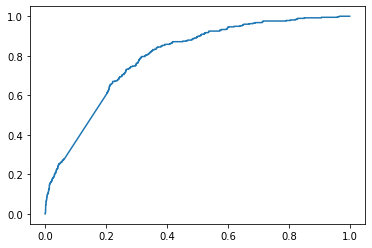

In [247]:
y_score = model.predict_proba(data_test[top_features])[:,1]

fpr, tpr, thresholds = roc_curve(data_test.target,y_score)
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13880
           1       0.88      0.17      0.29      1120

    accuracy                           0.94     15000
   macro avg       0.91      0.58      0.63     15000
weighted avg       0.93      0.94      0.92     15000

0.8801387852511322


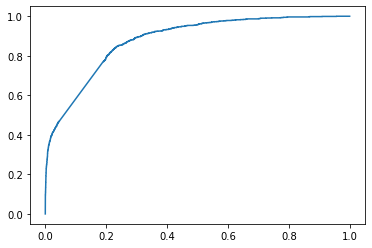

In [248]:
pred = model.predict(data_train[top_features])
print(classification_report(data_train.target, pred))

y_score = model.predict_proba(data_train[top_features])[:,1]

fpr, tpr, thresholds = roc_curve(data_train.target,y_score)
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr)
print(roc_auc)


In [249]:
y_score = model.predict_proba(data_test[top_features])[:,1]

data_test['pred'] = y_score

In [250]:
buckets = []
av_pred = []
av_target = []

for i in range(10):
    min_score = i/10
    max_score = (i+1)/10
    buckets.append((min_score+max_score)/2)
    
    temp = data_test[(data_test.pred > min_score) & (data_test.pred <= max_score)]
    print(len(temp))
    
    av_pred.append(np.mean(temp.pred))
    av_target.append(np.mean(temp.target))

3637
1113
107
58
31
19
20
9
4
2


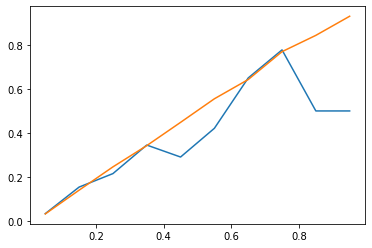

In [251]:
plt.plot(buckets,av_target)
plt.plot(buckets,av_pred)

In [252]:
buckets = []
av_pred = []
av_target = []

data_test = data_test.sort_values(by = 'pred', ascending=True)

for i in range(20):
    temp = data_test[len(data_test)*i//20:len(data_test)*(i+1)//20]
    
    buckets.append((np.min(temp.pred)+np.max(temp.pred))/2)
    
    av_pred.append(np.mean(temp.pred))
    av_target.append(np.mean(temp.target))

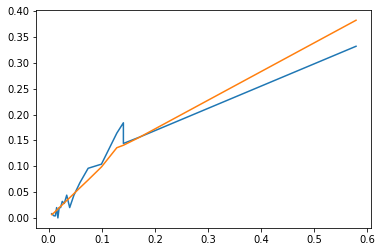

In [253]:
plt.plot(buckets,av_target)
plt.plot(buckets,av_pred)

In [254]:
imp = pd.DataFrame({'features': top_features, 'importance': model.feature_importances_})

In [255]:
imp = imp.sort_values(by='importance',ascending=False).reset_index(drop=True)

In [256]:
imp.head(20)

,features,importance
0,14,0.254074
1,13,0.073822
2,40,0.063889
3,32_101,0.060044
4,4_40,0.059419
5,39,0.054918
6,41_92,0.047373
7,42,0.046583
8,7,0.043216
9,31,0.037554


In [257]:
import shap

In [258]:
explainer = shap.TreeExplainer(model)

In [259]:
shap_values = explainer.shap_values(data_train[top_features])

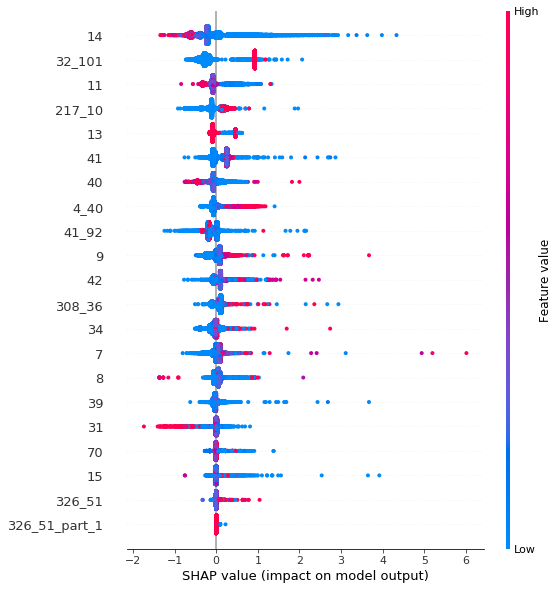

In [262]:
shap.summary_plot(shap_values,data_train[top_features],max_display=30)

In [ ]:
Importance by gain

In [174]:
feature = '326_51'

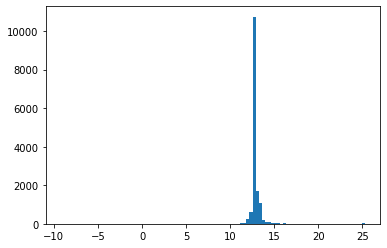

In [177]:
plot = plt.hist(np.log(data_train[feature]+0.0001),100)

In [176]:
sorted(pd.unique(data_train[feature]))

[0.0,
 1784.2624863432125,
 1995.7174161136202,
 2388.86504639564,
 7801.192093067268,
 17723.674031009243,
 28029.246886783018,
 40135.99876364761,
 55526.24857500077,
 57003.084858900555,
 57336.436037402214,
 58360.30035719849,
 63289.14058347062,
 69535.66909554944,
 71047.31298049336,
 72626.14098833544,
 79711.61239738327,
 80364.98573394105,
 83799.38389829907,
 88329.07624443025,
 90782.65942382814,
 93376.44722280628,
 96122.81062508156,
 99035.62012603403,
 100046.18664715017,
 102130.48003116019,
 104303.46665630549,
 105425.00810256529,
 107392.77653912424,
 108939.17113469187,
 111415.0585742446,
 112695.68995942971,
 114006.10343522138,
 116720.53123793165,
 119567.36999149247,
 121043.50853936454,
 122556.55050480414,
 125699.0221299637,
 130726.97631122333,
 132493.55468491773,
 134308.53239981015,
 136173.92609231628,
 140064.6041368424,
 142094.5229940157,
 144184.14525918904,
 146336.1442152979,
 148553.35516217977,
 150838.78787939376,
 153195.64025742744,
 155627.3

In [178]:
min_f = min(data_train[feature])
max_f = max(data_train[data_train[feature]<10000000][feature])

In [182]:
bins = []
target = []
num_bins = 30

for i in range(num_bins):
    temp = data_train[(data_train[feature]>min_f+(max_f-min_f)/num_bins*i) & (data_train[feature]<min_f+(max_f-min_f)/num_bins*(i+1))]
    bins.append(np.mean(temp[feature]))
    target.append(np.mean(temp['target']))
    print(len(temp),bins[-1],target[-1])

1574 246859.05944360574 0.048284625158831
12233 404979.04616765137 0.07618736205346195
732 728864.22272937 0.08060109289617487
85 1077525.8815210878 0.11764705882352941
75 1400628.0333194332 0.08
24 1634062.1483040925 0.041666666666666664
55 1960868.0418470388 0.18181818181818182
45 2454467.4844020717 0.08888888888888889
0 nan nan
0 nan nan
45 3273171.085209847 0.06666666666666667
0 nan nan
0 nan nan
0 nan nan
0 nan nan
44 4902023.046867343 0.11363636363636363
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan
0 nan nan


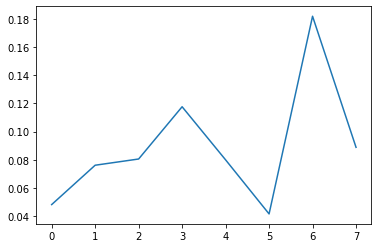

In [183]:
plt.plot(target[0:10])